In [1]:
##Model training
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X = df.drop(columns=['math score'],axis = 1)

In [5]:
Y = df['math score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [6]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()


preprocessor = ColumnTransformer([
    ('onehotencoder',cat_transformer,cat_features),
    ("standardscaler",num_transformer,num_features)
])





In [8]:
X = preprocessor.fit_transform(X)


In [9]:
X.shape

(1000, 19)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [15]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [16]:
def evaluate_model(true,pred):
    mae = mean_absolute_error(true,pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    score = r2_score(true,pred)
    return mae,mse,rmse,score


In [19]:
models =  {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(),
    "randomforest" : RandomForestRegressor(),
    "Catboost" : CatBoostRegressor(verbose=0),
    "Xgb" : XGBRegressor(verbose=0),
    "Adaboost" : AdaBoostRegressor()
    }

model_list =[]
r2_list = []


for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,Y_train)

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(Y_train,Y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance For Training Set")

    print("Root Mean Squared Error: ",model_train_rmse)
    print("Mean Absolute Error: ",model_train_mae)
    print("Mean Squared Error: ",model_train_mse)   
    print("R2 Score: ",model_train_r2)
    print("--"* 50)
    print("Model Performance For Testing Set")
    print("Root Mean Squared Error: ",model_test_rmse)      
    print("Mean Absolute Error: ",model_test_mae)
    print("Mean Squared Error: ",model_test_mse)
    print("R2 Score: ",model_test_r2)

    r2_list.append(model_test_r2)

    print("=="  * 50)


LinearRegression
Model Performance For Training Set
Root Mean Squared Error:  5.323050852720514
Mean Absolute Error:  4.266711846071957
Mean Squared Error:  28.33487038064859
R2 Score:  0.8743172040139593
----------------------------------------------------------------------------------------------------
Model Performance For Testing Set
Root Mean Squared Error:  5.393993869732843
Mean Absolute Error:  4.21476314247485
Mean Squared Error:  29.095169866715487
R2 Score:  0.8804332983749565
Lasso
Model Performance For Training Set
Root Mean Squared Error:  6.593815587795566
Mean Absolute Error:  5.206302661246526
Mean Squared Error:  43.47840400585579
R2 Score:  0.8071462015863456
----------------------------------------------------------------------------------------------------
Model Performance For Testing Set
Root Mean Squared Error:  6.519694535667419
Mean Absolute Error:  5.157881810347763
Mean Squared Error:  42.5064168384116
R2 Score:  0.8253197323627853
Ridge
Model Performance Fo

c:\projects\MLproject1\myproj\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Adaboost
Model Performance For Training Set
Root Mean Squared Error:  5.8263513114527035
Mean Absolute Error:  4.75243836334702
Mean Squared Error:  33.94636960446664
R2 Score:  0.8494267103343194
----------------------------------------------------------------------------------------------------
Model Performance For Testing Set
Root Mean Squared Error:  6.163897367026642
Mean Absolute Error:  4.83670525269831
Mean Squared Error:  37.99363075123797
R2 Score:  0.8438650424625215


Linear Regression R2 Score:  0.8804332983749565


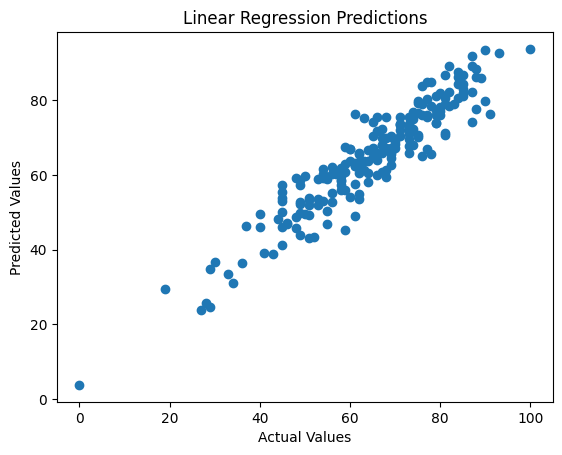

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,Y_train)
Y_pred = lin_model.predict(X_test)
score = r2_score(Y_test,Y_pred)
print("Linear Regression R2 Score: ", score)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")      
plt.title("Linear Regression Predictions")
plt.show()
